# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os
import csv
from scipy import stats

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# 'http://api.openweathermap.org/data/2.5/weather?appid=194c964e5a1a1183aaa918d387570b66&q=Bujumbura&units=metric'

#from config import weather_key

# Build URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_key + "&q="

# create list
responses = []

# Make a request for each city
for x in range(len(cities)):
    print(f"Processing Record: {x} for ID: {cities[x]}")

    # Get one of the posts
    post_response = requests.get(url + str(cities[x]))

    # Save post's JSON
    responses.append(post_response.json())
    


Processing Record: 0 for ID: viligili
Processing Record: 1 for ID: collie
Processing Record: 2 for ID: yulara
Processing Record: 3 for ID: westport
Processing Record: 4 for ID: ahome
Processing Record: 5 for ID: cape town
Processing Record: 6 for ID: mokshan
Processing Record: 7 for ID: bodden town
Processing Record: 8 for ID: albany
Processing Record: 9 for ID: punta arenas
Processing Record: 10 for ID: busselton
Processing Record: 11 for ID: invermere
Processing Record: 12 for ID: vestmannaeyjar
Processing Record: 13 for ID: acarau
Processing Record: 14 for ID: kaeo
Processing Record: 15 for ID: severo-kurilsk
Processing Record: 16 for ID: vestmanna
Processing Record: 17 for ID: bacuit
Processing Record: 18 for ID: vaini
Processing Record: 19 for ID: longyearbyen
Processing Record: 20 for ID: hobart
Processing Record: 21 for ID: jamestown
Processing Record: 22 for ID: thompson
Processing Record: 23 for ID: yanan
Processing Record: 24 for ID: brownwood
Processing Record: 25 for ID: ko

Processing Record: 207 for ID: simbahan
Processing Record: 208 for ID: leningradskiy
Processing Record: 209 for ID: mount gambier
Processing Record: 210 for ID: krasnoselkup
Processing Record: 211 for ID: lavrentiya
Processing Record: 212 for ID: luanda
Processing Record: 213 for ID: torbay
Processing Record: 214 for ID: nizhneyansk
Processing Record: 215 for ID: sibu
Processing Record: 216 for ID: pangody
Processing Record: 217 for ID: san andres
Processing Record: 218 for ID: nguiu
Processing Record: 219 for ID: poum
Processing Record: 220 for ID: chokurdakh
Processing Record: 221 for ID: kurilsk
Processing Record: 222 for ID: attawapiskat
Processing Record: 223 for ID: tignere
Processing Record: 224 for ID: san quintin
Processing Record: 225 for ID: vila franca do campo
Processing Record: 226 for ID: sentyabrskiy
Processing Record: 227 for ID: huarmey
Processing Record: 228 for ID: molteno
Processing Record: 229 for ID: atar
Processing Record: 230 for ID: maltahohe
Processing Record

Processing Record: 411 for ID: tilichiki
Processing Record: 412 for ID: paso de los toros
Processing Record: 413 for ID: college
Processing Record: 414 for ID: polyarnyy
Processing Record: 415 for ID: amapa
Processing Record: 416 for ID: ouargaye
Processing Record: 417 for ID: rabat
Processing Record: 418 for ID: suicheng
Processing Record: 419 for ID: sao joao da barra
Processing Record: 420 for ID: moratuwa
Processing Record: 421 for ID: penzance
Processing Record: 422 for ID: klaksvik
Processing Record: 423 for ID: carlagan
Processing Record: 424 for ID: russell
Processing Record: 425 for ID: mentougou
Processing Record: 426 for ID: sompeta
Processing Record: 427 for ID: evensk
Processing Record: 428 for ID: tigzirt
Processing Record: 429 for ID: kirkuk
Processing Record: 430 for ID: cadillac
Processing Record: 431 for ID: iqaluit
Processing Record: 432 for ID: kahului
Processing Record: 433 for ID: gudalur
Processing Record: 434 for ID: sorong
Processing Record: 435 for ID: chabaha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Build query URL and request your results in Celsius

url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_key + "&q="
units = "&units=imperial"

# create lists
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []

for city in cities:
    
    # Create search query, make request and store in json
    
    response = requests.get(url + city + units)
    response_json = response.json()
    
    try:
        
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        hum.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        wind.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])

    except:
        # Append null values       
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        hum.append(None)
        cloud.append(None)
        wind.append(None)
        country.append(None)
        date.append(None)
        
# create dataframe
city_data = pd.DataFrame({
    "City": cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max_Temp": max_temp,
    "Humidity": hum,
    "Cloudy": cloud,
    "Wind": wind,
    "Country": country,
    "Date": date
})

# Drop values with NaN and None values.
city_data.dropna(inplace = True) 



In [5]:
city_data.head()


,City,Latitude,Longitude,Max_Temp,Humidity,Cloudy,Wind,Country,Date
1,collie,-33.37,116.15,46.0,63.0,0.0,4.38,AU,1.592659e+09
2,yulara,-25.24,130.99,53.6,44.0,0.0,8.05,AU,1.592659e+09
3,westport,41.14,-73.36,75.0,83.0,1.0,4.70,US,1.592659e+09
4,ahome,25.92,-109.18,72.0,90.0,25.0,3.00,MX,1.592659e+09
5,cape town,-33.93,18.42,66.0,77.0,75.0,11.41,ZA,1.592659e+09


In [6]:
# Export the City_Data into a csv
city_data.to_csv ("../output_data/City_Weather.csv", index = False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check Max Humidity 

city_data.describe()


,Latitude,Longitude,Max_Temp,Humidity,Cloudy,Wind,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.750649,17.974333,70.866175,67.185965,46.042105,8.175123,1.592659e+09
std,32.882490,89.647287,15.279676,23.153734,39.323877,5.537037,5.847017e+01
min,-54.800000,-175.200000,32.000000,3.000000,0.000000,0.290000,1.592659e+09
25%,-5.210000,-59.397500,59.000000,55.250000,1.000000,4.067500,1.592659e+09
50%,25.210000,22.330000,73.480000,73.000000,40.000000,6.910000,1.592659e+09
75%,47.985000,96.107500,80.792500,83.000000,90.000000,11.410000,1.592659e+09
max,78.220000,178.420000,114.530000,100.000000,100.000000,47.180000,1.592659e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.

print("No data with humidity > 100%.  Max Humidity is 100%")


No data with humidity > 100%.  Max Humidity is 100%


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


print("No data with humidity > 100%.  Max Humidity is 100%")


No data with humidity > 100%.  Max Humidity is 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

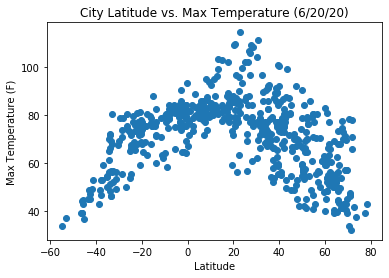

In [12]:
x_values = city_data['Latitude']
y_values = city_data['Max_Temp']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Max Temperature (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../output_data/LatitudevsTemperatureAll.png")
plt.show()


In [13]:
print("On the X axis the 0 point represents the equator.  As we get closer to the equator from the south (-60) and from the north (80) the temperature increases.")

On the X axis the 0 point represents the equator.  As we get closer to the equator from the south (-60) and from the north (80) the temperature increases.


## Latitude vs. Humidity Plot

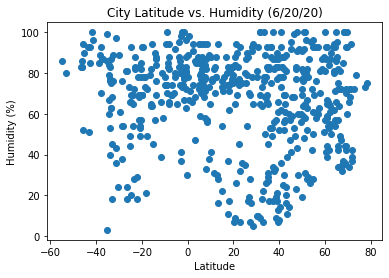

In [14]:
x_values = city_data['Latitude']
y_values = city_data['Humidity']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Humidity (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../output_data/LatitudevsHumidityAll.png")
plt.show()

In [15]:
print("There is no relationship between latitude and humidity.  Humidity is pretty uniform as you travel the X axis")

There is no relationship between latitude and humidity.  Humidity is pretty uniform as you travel the X axis


## Latitude vs. Cloudiness Plot

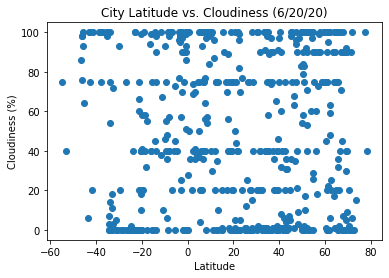

In [16]:
x_values = city_data['Latitude']
y_values = city_data['Cloudy']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Cloudiness (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/LatitudevsCloudinessAll.png")
plt.show()

In [17]:
print("There appears to be no relationship between latitude and cloudiness.  Cloudiness is pretty uniform as you travel the X axis")

There appears to be no relationship between latitude and cloudiness.  Cloudiness is pretty uniform as you travel the X axis


## Latitude vs. Wind Speed Plot

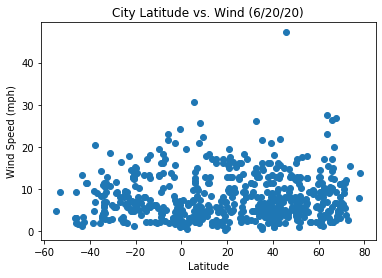

In [18]:
x_values = city_data['Latitude']
y_values = city_data['Wind']

# Display Plot
plt.scatter(x_values,y_values)

plt.title("City Latitude vs. Wind (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/LatitudevsWindSpeedAll.png")
plt.show()

In [19]:
print("There appears to be no relationship between latitude and wind.  Wind is pretty uniform as you travel the X axis")

There appears to be no relationship between latitude and wind.  Wind is pretty uniform as you travel the X axis


## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern Hemisphere Dataframe
north_hem_data = city_data.loc[(city_data['Latitude']>=0)]

# Extract relevant fields from the data frame to lists

# Create Souther Hemisphere Dataframe
south_hem_data = city_data.loc[(city_data['Latitude']<0)]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

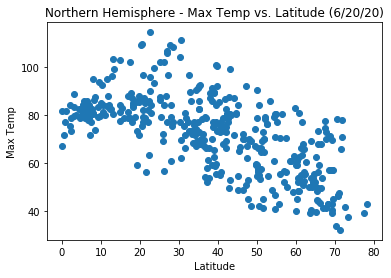

In [22]:
# Draw Scatter Plot for Northern Hem.
x_values = north_hem_data['Latitude']
y_values = north_hem_data['Max_Temp']

# Display Plot
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Max Temp vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


In [23]:
print("In the Northern Hemisphere, the further you get away from the equator (0 on the X axis) the temperature decreases")

In the Northern Hemisphere, the further you get away from the equator (0 on the X axis) the temperature decreases


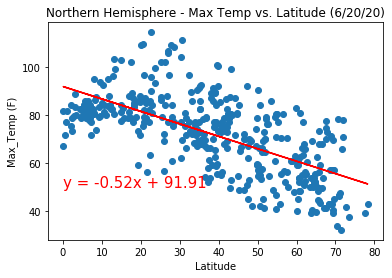

In [24]:
# Perform a linear regression on latitude versus Max Temp

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Max Temp vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp (F)')
plt.savefig("../output_data/LatitudevsTemperatureNorth.png")
plt.show()

In [25]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Moderate Negative Strength of Correlation between Max Temp and Latitude in the Northern Hemisphere")

The r value is: -0.6546818167732021
The r-squared is: 0.4286082812134606
There is a Moderate Negative Strength of Correlation between Max Temp and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

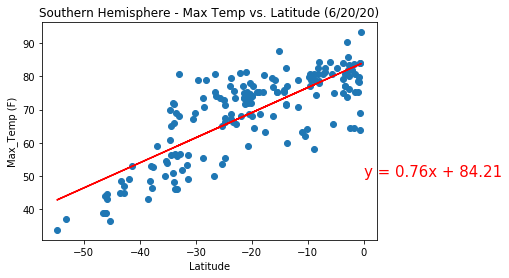

In [26]:
# Draw Scatter Plot for Southern Hem.

x_values = south_hem_data['Latitude']
y_values = south_hem_data['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp (F)')
plt.savefig("../output_data/LatitudevsTemperatureSouth.png")
plt.show()


In [27]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Moderate Positive Strength of Correlation between Max Temp and Latitude in the Southern Hemisphere")

The r value is: 0.7868620344496671
The r-squared is: 0.619151861258269
There is a Moderate Positive Strength of Correlation between Max Temp and Latitude in the Southern Hemisphere


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

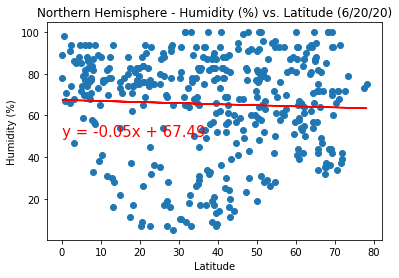

In [28]:
# Draw Scatter Plot for Northern Hem.

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../output_data/LatitudevsHumidityNorth.png")
plt.show()


In [29]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Humidity and Latitude in the Northern Hemisphere")

The r value is: -0.04289006878128029
The r-squared is: 0.0018395580000629538
There is a Weak Negative Strength of Correlation between Humidity and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

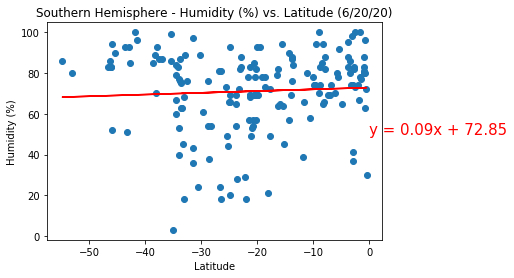

In [30]:
# Draw Scatter Plot for Northern Hem.
x_values = south_hem_data['Latitude']
y_values = south_hem_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../output_data/LatitudevsHumiditySouth.png")
plt.show()

In [31]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Positive Strength of Correlation between Humidity and Latitude in the Southern Hemisphere")

The r value is: 0.05839289610640204
The r-squared is: 0.0034097303156930625
There is a Weak Positive Strength of Correlation between Humidity and Latitude in the Southern Hemisphere


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

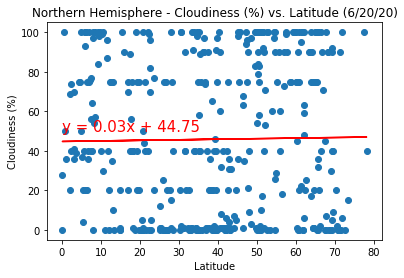

In [32]:
# Draw Scatter Plot for Northern Hem.

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Cloudy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/LatitudevsCloudNorth.png")
plt.show()


In [33]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Cloudiness and Latitude in the Northern Hemisphere")

The r value is: 0.014805329117674496
The r-squared is: 0.00021919777028266027
There is a Weak Negative Strength of Correlation between Cloudiness and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

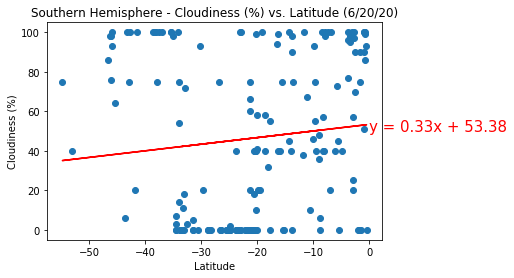

In [34]:
# Draw Scatter Plot for Southern Hem.

x_values = south_hem_data['Latitude']
y_values = south_hem_data['Cloudy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/LatitudevsCloudSouth.png")
plt.show()

In [35]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Positive Strength of Correlation between Cloudiness and Latitude in the Southern Hemisphere")

The r value is: 0.1105440884709348
The r-squared is: 0.012219995495869862
There is a Weak Positive Strength of Correlation between Cloudiness and Latitude in the Southern Hemisphere


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

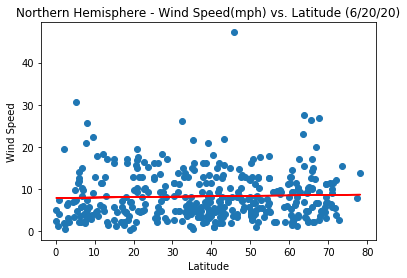

In [36]:
# Draw Scatter Plot for Northern Hem.

x_values = north_hem_data['Latitude']
y_values = north_hem_data['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/LatitudevsWindNorth.png")
plt.show()


In [37]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Northern Hemisphere")

The r value is: 0.036037148237462104
The r-squared is: 0.001298676053088818
There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Northern Hemisphere


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

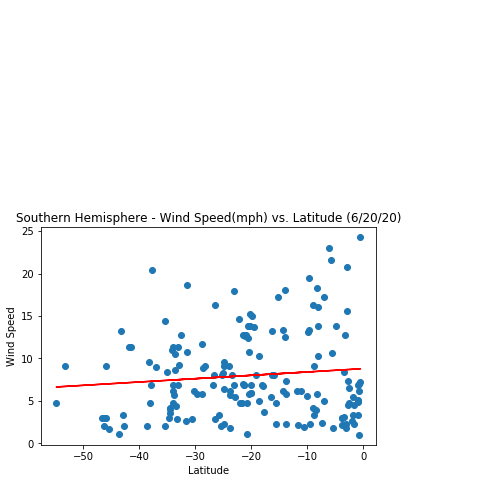

In [38]:
# Draw Scatter Plot for Northern Hem.

x_values = south_hem_data['Latitude']
y_values = south_hem_data['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude (6/20/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/LatitudevsWindSouth.png")
plt.show()

In [39]:
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

print("There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Southern Hemisphere")

The r value is: 0.10323105428632048
The r-squared is: 0.010656650569065246
There is a Weak Negative Strength of Correlation between Wind Speed and Latitude in the Southern Hemisphere
